In [1]:
# prompt: unzip binary_masks.zip

!unzip binary_masks.zip


Archive:  binary_masks.zip
   creating: binary_masks/
   creating: binary_masks/binary_masks/
   creating: binary_masks/binary_masks/basophil/
  inflating: binary_masks/binary_masks/basophil/BA_102039.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_107876.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_128084.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_129537.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_147402.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_157951.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_162483.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_166406.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_168566.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_173620.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_174731.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_175269.jpg  
  inflating: binary_masks/binary_masks/basophil/BA_178853.jpg  
  inflating: binary_masks

In [5]:
# prompt: unzip /content/original_images.zip

!unzip original_images.zip


Archive:  original_images.zip
   creating: original_images/
   creating: original_images/original_images/
   creating: original_images/original_images/basophil/
  inflating: original_images/original_images/basophil/BA_102039.jpg  
  inflating: original_images/original_images/basophil/BA_107876.jpg  
  inflating: original_images/original_images/basophil/BA_128084.jpg  
  inflating: original_images/original_images/basophil/BA_129537.jpg  
  inflating: original_images/original_images/basophil/BA_147402.jpg  
  inflating: original_images/original_images/basophil/BA_157951.jpg  
  inflating: original_images/original_images/basophil/BA_162483.jpg  
  inflating: original_images/original_images/basophil/BA_166406.jpg  
  inflating: original_images/original_images/basophil/BA_168566.jpg  
  inflating: original_images/original_images/basophil/BA_173620.jpg  
  inflating: original_images/original_images/basophil/BA_174731.jpg  
  inflating: original_images/original_images/basophil/BA_175269.jpg  

In [5]:
# prompt: read the images from subfolders of original_images and create a new dataset with the image and the label is the characters before the first underscore of the file name. Create a list X with the image and another list Y as the corresponding classname

import os
import cv2
from PIL import Image

def create_dataset(image_dir):
    X = []
    Y = []
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                label = file.split('_')[0]  # Extract label before the first underscore
                image_path = os.path.join(root, file)
                try:
                  img = cv2.imread(image_path)
                  if img is not None:
                      X.append(img)
                      Y.append(label)
                  else:
                    print(f"Could not read image: {image_path}")
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")
    return X, Y

# Example usage
original_images_dir = 'original_images' # Replace with your actual directory
X, Y = create_dataset(original_images_dir)

# Now X contains the images and Y contains their corresponding labels
print("Number of images loaded:", len(X))
print("Number of labels:", len(Y))
# You can then use X and Y for your model training


Number of images loaded: 1560
Number of labels: 1560


In [7]:
# prompt: make a dataset with images from SUBFOLDERS OF original_images and IMAGES FROM SUBFOLDERS OF binary_masks as labels

import os
import cv2
from PIL import Image

def create_dataset(image_dir, mask_dir):
    X = []
    Y = []
    image_filenames = set()

    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                image_filenames.add(file)
                try:
                    img = cv2.imread(image_path)
                    if img is not None:
                        X.append(img)
                    else:
                        print(f"Could not read image: {image_path}")
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    for root, _, files in os.walk(mask_dir):
      for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')) and file in image_filenames:
          mask_path = os.path.join(root, file)
          try:
              mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # Read as grayscale
              if mask is not None:
                  Y.append(mask)
              else:
                  print(f"Could not read mask: {mask_path}")
          except Exception as e:
              print(f"Error processing mask {mask_path}: {e}")

    return X, Y

# Example usage
original_images_dir = 'original_images'
binary_masks_dir = 'binary_masks'
X, Y = create_dataset(original_images_dir, binary_masks_dir)

print("Number of images loaded:", len(X))
print("Number of masks loaded:", len(Y))


Number of images loaded: 1560
Number of masks loaded: 1560


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 256, 256, 32)      │             896 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 128, 128, 32)      │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 128, 128, 64)      │          18,496 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 64, 64, 64)        │               0 │ conv2d_6[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_2               │ (None, 128, 128, 64)      │               0 │ max_pooling2d_3[0][0]      │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 128, 128, 128)     │               0 │ conv2d_6[0][0],            │
│                               │                           │                 │ up_sampling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 128, 128, 64)      │          73,792 │ concatenate_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_3               │ (None, 256, 256, 64)      │               0 │ conv2d_7[0][0]             │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_3 (Concatenate)   │ (None, 256, 256, 96)      │               0 │ conv2d_5[0][0],            │
│                               │                           │                 │ up_sampling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 256, 256, 32)      │          27,680 │ concatenate_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 256, 256, 1)       │              33 │ conv2d_8[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 120,897 (472.25 KB)

 Trainable params: 120,897 (472.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8984 - loss: 0.3032 - val_accuracy: 0.9611 - val_loss: 0.1034
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9618 - loss: 0.0955 - val_accuracy: 0.9689 - val_loss: 0.0688
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9673 - loss: 0.0738 - val_accuracy: 0.9687 - val_loss: 0.0700
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9675 - loss: 0.0690 - val_accuracy: 0.9690 - val_loss: 0.0679
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9681 - loss: 0.0685 - val_accuracy: 0.9709 - val_loss: 0.0593
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9680 - loss: 0.0685 - val_accuracy: 0.9699 - val_loss: 0.0630
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9700 - loss: 0.0609 - val_accuracy: 0.9629 - val_loss: 0.0779
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9670 - loss: 0.0694 - val_accuracy: 0.9706 - val_loss:

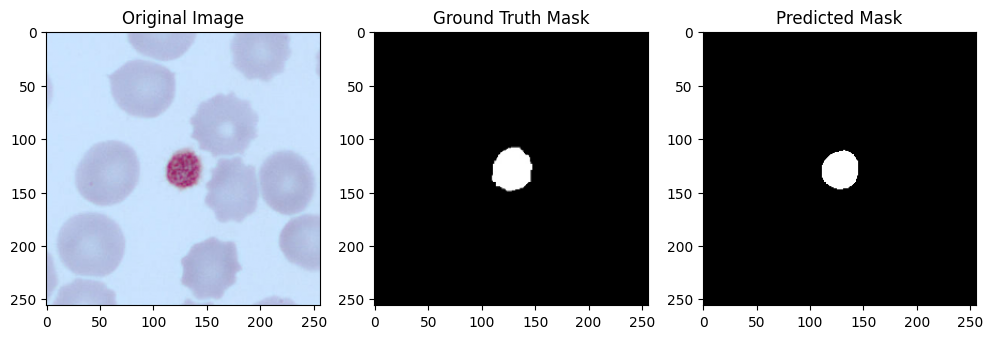

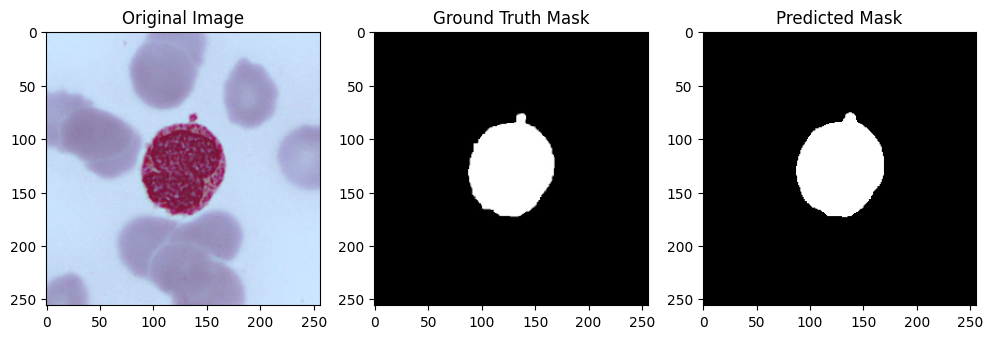

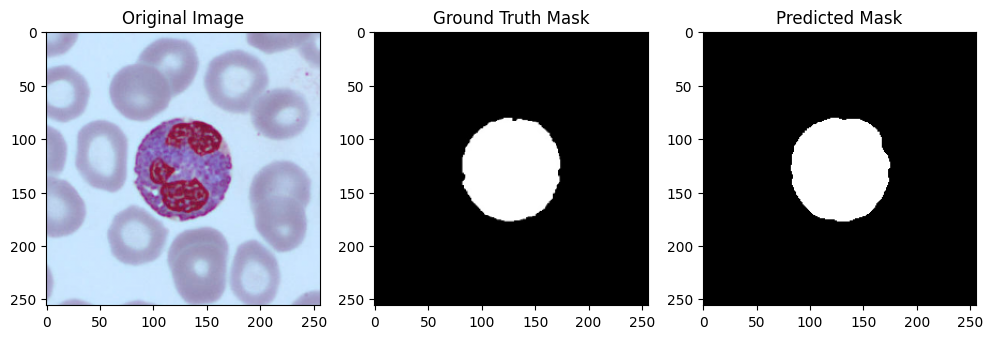

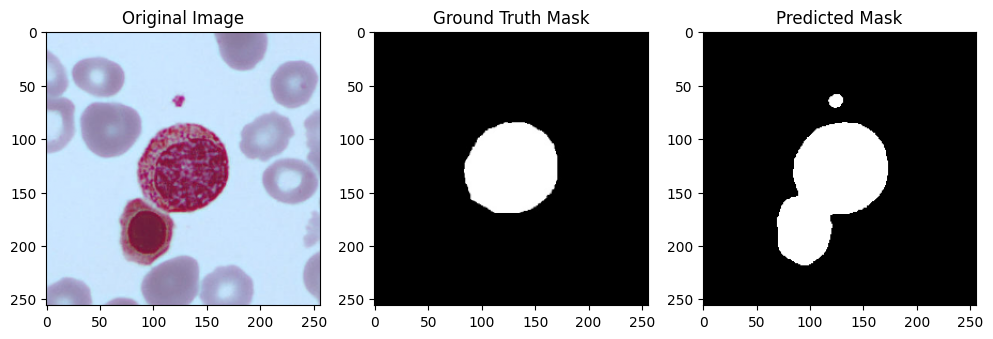

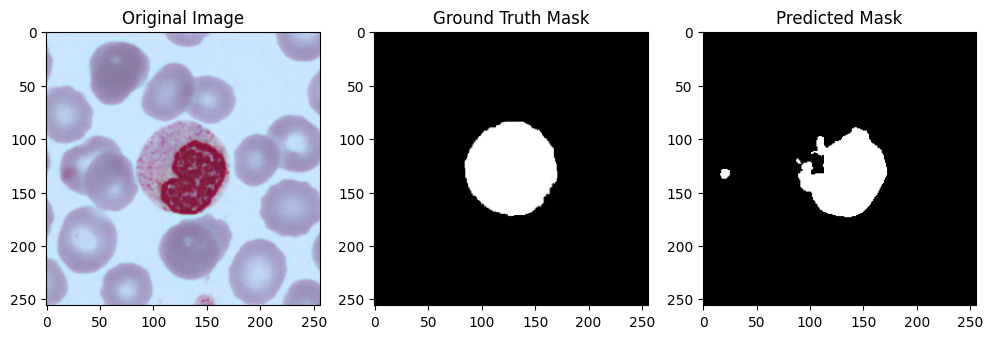

In [11]:
#  CREATE A MODEL FOR BINARY SEGMENTATION USING x AND LABEL y. DISPLAY ORIGINAL IMAGE, MASK AND SEGMENTED IMAGE IN TEST SET

import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you've already unzipped the files and have the create_dataset function

original_images_dir = 'original_images'
binary_masks_dir = 'binary_masks'
X, Y = create_dataset(original_images_dir, binary_masks_dir)

# Preprocessing (resize and normalize)
IMG_HEIGHT, IMG_WIDTH = 256, 256  # Adjust as needed
X_resized = []
Y_resized = []

for img, mask in zip(X, Y):
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))
    X_resized.append(img / 255.0)  # Normalize pixel values
    Y_resized.append(mask / 255.0)  # Normalize mask values

X_resized = np.array(X_resized)
Y_resized = np.array(Y_resized)
Y_resized = np.expand_dims(Y_resized, axis=-1) # Add channel dimension


# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X_resized, Y_resized, test_size=0.2, random_state=42)

# Model (Simple U-Net like architecture - replace with a more sophisticated model if needed)
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, concatenate
from tensorflow.keras.models import Model

def create_model(input_shape):
    inputs = Input(shape=input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    # ... more layers as needed

    up2 = UpSampling2D(size=(2, 2))(pool2)
    merge2 = concatenate([conv2, up2], axis=3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge2)

    up1 = UpSampling2D(size=(2, 2))(conv3)
    merge1 = concatenate([conv1, up1], axis=3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge1)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv4)  # Sigmoid for binary segmentation

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
model = create_model(input_shape)
model.summary()

# Train the model
MASK_HISTORY=model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split = 0.2) #Adjust epochs and batch size

# Predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(np.uint8) # Binarize predictions

# Display results
for i in range(5): # Display the first 5 images
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i])
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(Y_test[i, :, :, 0], cmap='gray')
    plt.title('Ground Truth Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.title('Predicted Mask')
    plt.show()


In [21]:
# prompt: generate a CNN model for classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os

# Assuming X and Y are already defined from the previous code
image_size = (128, 128) # set a fixed image size

X_resized = []
for img in X:
    # Resize the image
    resized_img = cv2.resize(img, image_size)
    # Convert to NumPy array and append to list
    X_resized.append(img_to_array(resized_img))

X = np.array(X_resized)  # Normalize pixel values
Y = np.array(Y)

# Rest of your code remains the same...
# Convert labels to numerical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
num_classes = len(label_encoder.classes_)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
history=model.fit(X, Y_encoded, epochs=10) # Adjust epochs as needed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 712ms/step - accuracy: 0.2144 - loss: 169.2673
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 682ms/step - accuracy: 0.6149 - loss: 1.1992
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 712ms/step - accuracy: 0.7730 - loss: 0.7032
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 696ms/step - accuracy: 0.8783 - loss: 0.3910
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 687ms/step - accuracy: 0.9088 - loss: 0.3195
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 703ms/step - accuracy: 0.9545 - loss: 0.1707
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 678ms/step - accuracy: 0.9814 - loss: 0.0919
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 708ms/step - accuracy: 0.9965 - loss: 0.0262
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 714ms/step - accuracy: 0.9972 - loss: 0.0187
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 725ms/step - accuracy: 0.9987 - loss: 0.0079


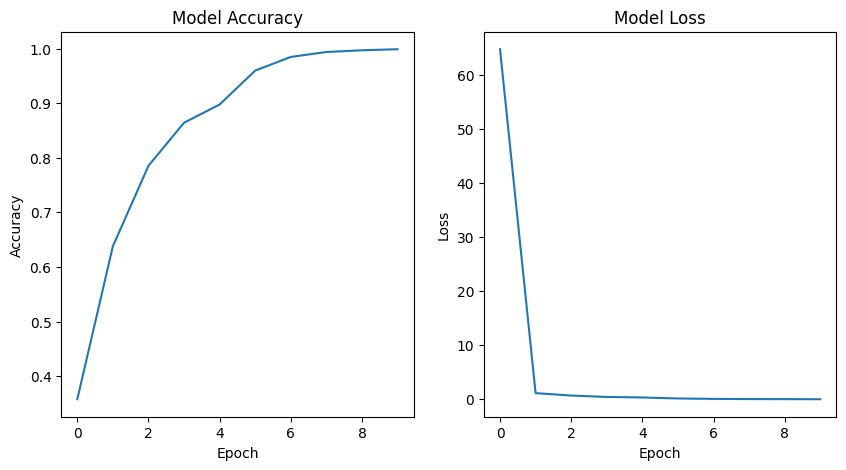

49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step


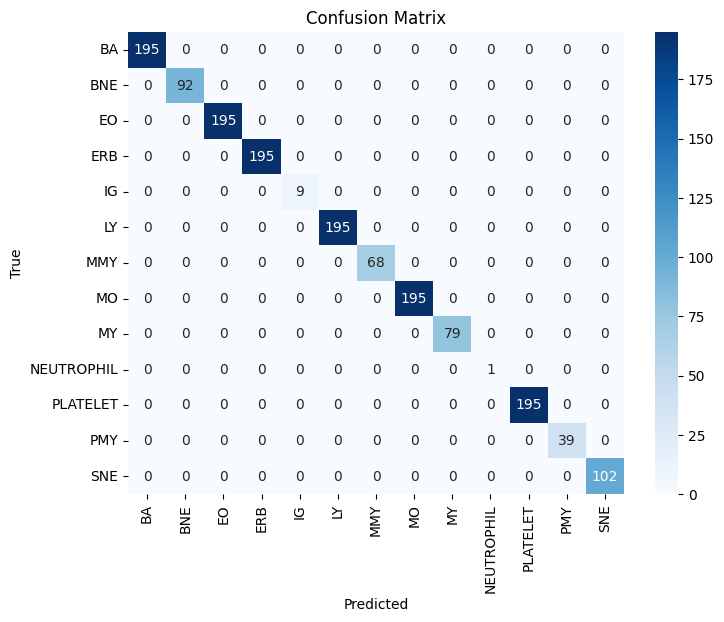

ROC curve is not applicable for multi-class classification


In [22]:
# prompt: plot training accuracy and loss, confusion matrix, rOC

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# Plot training accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


# Assuming you have y_true (true labels) and y_pred (predicted probabilities)
# Replace these with your actual data
y_pred = model.predict(X) # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1) # Predicted classes
y_true = Y_encoded # True labels

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# ROC curve (example for binary classification, adapt for multi-class)
if num_classes == 2: #ROC is for binary classification
  fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1]) # Assuming class 1 is the positive class
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
else:
  print("ROC curve is not applicable for multi-class classification")


In [7]:
# prompt: create the dataset to use images from /content/original_images.zip and masks from binary_masks folder. If match is not found drop the image

import os
import shutil

def create_matched_dataset(image_dir, mask_dir, output_dir):
    """
    Creates a dataset by matching images and masks, copying only pairs with matching filenames.

    Args:
        image_dir: Path to the directory containing images.
        mask_dir: Path to the directory containing masks.
        output_dir: Path to the directory where the matched dataset will be created.
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    image_files = set(os.listdir(image_dir))
    mask_files = set(os.listdir(mask_dir))

    matched_files = image_files.intersection(mask_files)

    for filename in matched_files:
        image_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename)
        output_image_path = os.path.join(output_dir, "images", filename)
        output_mask_path = os.path.join(output_dir, "masks", filename)


        os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
        os.makedirs(os.path.dirname(output_mask_path), exist_ok=True)

        shutil.copy2(image_path, output_image_path)
        shutil.copy2(mask_path, output_mask_path)

# Example usage:
image_directory = "/content/original_images"
mask_directory = "/content/binary_masks"
output_directory = "/content/matched_dataset"

create_matched_dataset(image_directory, mask_directory, output_directory)
print(f"Matched dataset created at: {output_directory}")


Matched dataset created at: /content/matched_dataset
